# **Exploratory Data Analysis**

## Objectives

1. Load raw dataset into a Pandas Dataframe
2. Appraise data quality
3. Explore data using descriptive statistics and visualisations

## Inputs

- Raw ACLED dataset (CSV), obtained from https://acleddata.com/

## Outputs

1. Optimised data set saved as CSV file
2. Set of descriptive statistics and figure
3. Insights into data strenghts, weaknesses
4. Data cleaning task list

## Additional Comments

- Loading operation presented a challenge: the raw dataset in CSV format is over 600 MB in size 



In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Loading operation

The large size of the dataset (over 600 MB) may cause RAM issues if loaded as is. To mitigate this, the plan was to:

1. Load a preview of 10 rows for assessment. Choose which columns to keep and the smallest format that they could be converted into.
2. Load the entire data set according to the column and dtypes selection from Step 1.

In [7]:
# load a preview of the dataset to mitigate potential memory issues
df_preview = pd.read_csv(Path.cwd().parent / 'data/raw/original_acled.csv', nrows=10)
df_preview.head(10)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,population_best
0,MMR1,2010-01-01,2010,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),DKBA (Buddhist): Democratic Karen Buddhist Arm...,State forces,...,98.1232,2,Democratic Voice of Burma,National,"On 1 January 2010, the Democratic Karen Buddhi...",0,NaN,1552577624,NaN,NaN
1,SOM5580,2010-01-01,2010,1,Political violence,Battles,Armed clash,HI: Hizbul Islam,NaN,Political militia,...,44.6905,1,Radio Gaalkacyo,National,Fighters loyal to Hisb Al-Islam group reported...,7,NaN,1572403772,NaN,NaN
2,BGD7238,2010-01-01,2010,1,Political violence,Battles,Armed clash,BCL: Bangladesh Chhatra League,Students (Bangladesh),Political militia,...,89.7080,1,Right Vision News,International,Two factions of the BCL- one led by Kamal and ...,0,NaN,1618526280,NaN,NaN
3,ETH1319,2010-01-01,2010,1,Political violence,Battles,Armed clash,Military Forces of Eritrea (1993-),NaN,External/Other forces,...,39.4437,2,AFP,International,Eritrea accused arch-foe Ethiopia on Sunday of...,10,NaN,1618529663,NaN,NaN
4,ETH1320,2010-01-01,2010,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),NaN,State forces,...,39.3850,2,All Africa,International,Eritrean military claims Ethiopian troops atta...,10,NaN,1618529663,NaN,NaN
5,PAK7,2010-01-01,2010,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,TTP: Tehreek-i-Taliban Pakistan,NaN,Rebel group,...,71.5141,1,Right Vision News,National,"At least 5 people, including a pro-government ...",5,NaN,1615334313,NaN,NaN
6,PAK3,2010-01-01,2010,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Pakistan),NaN,Political militia,...,67.0822,1,Daily Times (Pakistan),National,2 activists of the MQM-H and 1 of the MQM were...,3,NaN,1618442078,NaN,NaN
7,DRC4737,2010-01-01,2010,3,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,NaN,Rebel group,...,27.7667,2,HRW,Other,"1 killed, 1 abducted at Makolongbo",1,NaN,1618597675,NaN,NaN
8,DRC4733,2010-01-01,2010,1,Political violence,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,State forces,...,18.4000,1,Reuters,International,157 insurgents and one soldier from the Congol...,79,NaN,1618597675,NaN,NaN
9,DRC4736,2010-01-01,2010,3,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,NaN,Rebel group,...,27.7667,2,HRW,Other,1 killed on Gwane-Mboki path,1,NaN,1618597675,NaN,NaN


In [8]:
# specify columns to keep
to_keep = ['event_id_cnty', 'event_date', 'disorder_type', 'event_type', 'sub_event_type', 'actor1', 
           'inter1', 'actor2', 'inter2', 'interaction', 'region', 'country', 'latitude', 'longitude',
           'geo_precision', 'source', 'source_scale','notes',  'fatalities',  'population_1km', 
           'population_best']

# define data types for each column
dtype_map = {
    "event_id_cnty": "string",           
    "disorder_type": "category",
    "event_type": "category",
    "sub_event_type": "category",
    "actor1": "category",
    "inter1": "category",                   
    "actor2": "category",
    "inter2": "category",                 
    "interaction": "category",               
    "region": "category",
    "country": "category",
    "latitude": "float32",
    "longitude": "float32",
    "geo_precision": "int8",           
    "source": "category",
    "source_scale": "category",
    "notes": "string",                   
    "fatalities": "int16",               
    "population_1km": "float32",       
    "population_best": "float32"    
}

# load the dataset with specified columns and data types
df = pd.read_csv(
    Path.cwd().parent / 'data/raw/original_acled.csv',
    usecols=to_keep,
    dtype=dtype_map,
    parse_dates=["event_date"],
    low_memory=False
)

In [9]:
# save optimised dataframe
df.to_csv(Path.cwd().parent / 'data/raw/acled_original_optimised.csv', index=False)

# EDA

## Data Quality appraisal

In [10]:
# view dataframe
df.head()

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,country,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,population_1km,population_best
0,MMR1,2010-01-01,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),State forces,Civilians (Myanmar),Civilians,State forces-Civilians,...,Myanmar,16.040800,98.123199,2,Democratic Voice of Burma,National,"On 1 January 2010, the Democratic Karen Buddhi...",0,NaN,NaN
1,SOM5580,2010-01-01,Political violence,Battles,Armed clash,HI: Hizbul Islam,Political militia,Unidentified Armed Group (Somalia),Political militia,Political militia-Political militia,...,Somalia,2.252400,44.690498,1,Radio Gaalkacyo,National,Fighters loyal to Hisb Al-Islam group reported...,7,NaN,NaN
2,BGD7238,2010-01-01,Political violence,Battles,Armed clash,BCL: Bangladesh Chhatra League,Political militia,BCL: Bangladesh Chhatra League,Political militia,Political militia-Political militia,...,Bangladesh,24.457701,89.708000,1,Right Vision News,International,Two factions of the BCL- one led by Kamal and ...,0,NaN,NaN
3,ETH1319,2010-01-01,Political violence,Battles,Armed clash,Military Forces of Eritrea (1993-),External/Other forces,Military Forces of Ethiopia (1991-2018),State forces,State forces-External/Other forces,...,Ethiopia,14.509100,39.443699,2,AFP,International,Eritrea accused arch-foe Ethiopia on Sunday of...,10,NaN,NaN
4,ETH1320,2010-01-01,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),State forces,Military Forces of Eritrea (1993-),External/Other forces,State forces-External/Other forces,...,Ethiopia,14.521900,39.384998,2,All Africa,International,Eritrean military claims Ethiopian troops atta...,10,NaN,NaN


In [11]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065312 entries, 0 to 1065311
Data columns (total 21 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   event_id_cnty    1065312 non-null  string        
 1   event_date       1065312 non-null  datetime64[ns]
 2   disorder_type    1065312 non-null  category      
 3   event_type       1065312 non-null  category      
 4   sub_event_type   1065312 non-null  category      
 5   actor1           1065312 non-null  category      
 6   inter1           1065312 non-null  category      
 7   actor2           858029 non-null   category      
 8   inter2           858029 non-null   category      
 9   interaction      1065312 non-null  category      
 10  region           1065312 non-null  category      
 11  country          1065312 non-null  category      
 12  latitude         1065312 non-null  float32       
 13  longitude        1065312 non-null  float32       
 14  ge

The loading procedure achieved a ~ 90% size reduction. Furthermore, the data types have been already set and do not need further modifying, which would otherwise be the next step.

In [12]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
# check for duplicate event IDs
df['event_id_cnty'].duplicated().sum()

np.int64(0)

No overall duplicated rows and no duplicated event ids, can move on. Otherwise, use .drop_duplicates() function.

In [14]:
# check for missing values
df.isnull().sum()

event_id_cnty           0
event_date              0
disorder_type           0
event_type              0
sub_event_type          0
actor1                  0
inter1                  0
actor2             207283
inter2             207283
interaction             0
region                  0
country                 0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
population_1km      48294
population_best     48294
dtype: int64

In [15]:
# check if missing values in actor2 correspond to missing values in inter2
print(f'Actor2 and Inter2 missing values correspond: {(df[df['actor2'].isnull()].index == df[df['inter2'].isnull()].index).all()}')

# check if missing values in population_1km correspond to missing values in population_best
print(f'Population_1km and Population_best missing values correspond: {(df[df['population_1km'].isnull()].index == df[df['population_best'].isnull()].index).all()}')

Actor2 and Inter2 missing values correspond: True
Population_1km and Population_best missing values correspond: True


<ins>**2 instances of missing values**</ins>:

1. 'actor2' and 'inter2' both refer to one side of the conflict, which explains why when the values of one col is missing the other col also has a missing value. NANs account for about <ins>20% of the dataset </ins>.
2. 'population_1km' and 'population_best' come from the same source, therefore when one is missing, so is the other. NANs account for about <ins>5%</ins>.

<ins>**Pseudo-missing Values**</ins>

Besides the aforementioned, no other columns with nans were identified by .isnull(). However, this function works based on data type(i.e. NaN/None values) and will miss nans expressed as, for example: 0, 'missing', 'na' etc.


In [16]:
# try several common markers for missing values
missing_strings = ["NA", "N/A", "n/a", "na", "NULL", "null", "-", "", "Unknown", "Unspecified", "?"]

for col in df.columns:
    mask = df[col].astype(str).isin(missing_strings)
    if mask.any():
        print(col, mask.sum())
    else:
        print(f'None found in col {col}')

None found in col event_id_cnty
None found in col event_date
None found in col disorder_type
None found in col event_type
None found in col sub_event_type
None found in col actor1
None found in col inter1
None found in col actor2
None found in col inter2
None found in col interaction
None found in col region
None found in col country
None found in col latitude
None found in col longitude
None found in col geo_precision
None found in col source
None found in col source_scale
None found in col notes
None found in col fatalities
None found in col population_1km
None found in col population_best


In [17]:
# check whitespaces 
mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == "")
df[mask.any(axis=1)]

/var/folders/6d/4qqmbbk90jg_rr8cp3n70klw0000gn/T/ipykernel_2107/1629840460.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == "")


,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,country,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,population_1km,population_best


<ins>**Erroneous values**</ins>

Although not exactly missing values, erroneous values may indicate major faults which would be de facto turned into missing values and handled accordingly.

In [18]:
# check numeric cols
df.describe().T

,count,mean,min,25%,50%,75%,max,std
event_date,1065312,2020-10-25 06:43:46.277372416,2010-01-01 00:00:00,2018-09-09 00:00:00,2021-04-15 00:00:00,2023-06-26 00:00:00,2024-12-01 00:00:00,NaN
latitude,1065312.0,24.88032,-53.1548,13.2007,31.350201,36.6534,69.3535,18.604832
longitude,1065312.0,26.980579,-172.0215,29.358,37.303001,44.5877,179.367996,48.257523
geo_precision,1065312.0,1.451825,1.0,1.0,1.0,2.0,3.0,0.534611
fatalities,1065312.0,1.602291,0.0,0.0,0.0,1.0,1000.0,6.769863
population_1km,1017018.0,9755.048828,0.0,358.0,2437.0,13103.0,345685.0,16113.979492
population_best,1017018.0,61617.964844,0.0,1280.0,8784.0,46513.0,1854773.0,141270.4375


- event_date matches the range specified in the download tool
- lat and long make sense but need a more in depth look
- geo_precision is correct
- fatalities make sense, most of them will be 0
- populations also make sense

In [19]:
# latitude and longitude validity checks
invalid_coords = df[
    (df["latitude"] == 0) |
    (df["longitude"] == 0) |
    (df["latitude"].abs() > 90) |
    (df["longitude"].abs() > 180)
]
invalid_coords.head()

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,country,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,population_1km,population_best
21154,SOM9907,2012-10-15,Political violence,Battles,Government regains territory,AMISOM: African Union Mission in Somalia (2007...,External/Other forces,Al Shabaab,Rebel group,Rebel group-External/Other forces,...,Somalia,0.0,42.00,2,Jawhar,National,AMISOM forces overtake a Shabaab held town in ...,10,NaN,NaN
90747,SOM20503,2016-08-03,Political violence,Battles,Armed clash,Military Forces of Somalia (2012-2017),State forces,Al Shabaab,Rebel group,State forces-Rebel group,...,Somalia,0.0,42.00,1,Xinhua,International,At least four Al-Shabaab militants were killed...,4,0.0,1.0
388241,KEN6972,2019-10-12,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Al Shabaab,Rebel group,Police Forces of Kenya (2013-2022) General Ser...,State forces,State forces-Rebel group,...,Kenya,0.0,40.25,2,Kenya Standard; Star (Kenya),National,"On 12 October 2019, an IED planted by suspecte...",11,5.0,755.0


A quick manual search confirms that these coordinates match the country their are supposed to represent.

In [20]:
# check categorical cols for erroneous values
for col in df.select_dtypes(include=['category']).columns:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print('---')

Column: disorder_type
disorder_type
Political violence    1065312
Name: count, dtype: int64
---
Column: event_type
event_type
Explosions/Remote violence    420536
Battles                       384115
Violence against civilians    260661
Name: count, dtype: int64
---
Column: sub_event_type
sub_event_type
Armed clash                            368083
Attack                                 225278
Shelling/artillery/missile attack      212800
Air/drone strike                       139381
Remote explosive/landmine/IED           58467
Abduction/forced disappearance          30698
Government regains territory             9759
Grenade                                  7672
Non-state actor overtakes territory      6273
Sexual violence                          4685
Suicide bomb                             2101
Chemical weapon                           115
Name: count, dtype: int64
---
Column: actor1
actor1
Military Forces of Russia (2000-)                                            104058
Militar

<ins>**Conclusions**</ins>

1. To drop:
    - disorder_type, has only 1 value type

2. Consider dropping:
    - actor1/actor2 (name of beligerent), many unique values, difficult to interpret
3. interaction, check if column value can be grouped together
4. source, try to recategorise values, too many in current state
5. source_scale, try to recategorise values, note category 'Other' 

<ins>**Check Coordinate Precision**</ins>

This analysis relies heavily on geo location precision. The column 'geo_precision' specifies the quality of the lat./long. coordinates provided for the event. 

Two issues:

1. Coordinate precision: Level 3 means low-quality. If there are too many of these, I may consider treating them separately.
2. Amount of events sharing identical coordinates: too many would indicate that they were automatically assigned a centroid location (i.e. the inputer did not have the exat coordinates so they assigned a central location for several events, even though they did not take place in such high proximity)

In [21]:
# check geo_precision values
df["geo_precision"].value_counts()

geo_precision
1    604287
2    440715
3     20310
Name: count, dtype: int64

That is good: level 3 makes up a very small part of the dataset.

In [22]:
# check for multiple events at the same location
df.groupby(["latitude", "longitude"]).size().sort_values(ascending=False).head(20)

latitude    longitude  
-22.856899  -43.300800     4625
-12.971100  -38.510799     3547
-22.914700  -43.487900     3112
-3.101900   -60.025002     3010
 32.532501  -117.018997    2268
 46.655800   32.617802     2135
 13.931700   43.483101     1992
 21.122000  -101.683197    1850
 35.942799   39.051899     1707
 48.139400   37.749699     1625
-22.826900  -43.053902     1623
 34.516701   69.183296     1463
 47.942501   37.505001     1390
 14.622500  -90.518402     1358
 37.092098   43.487701     1334
 2.037600    45.305801     1314
 15.449300   45.018902     1296
 14.637000   43.055099     1276
 31.820900   64.570000     1272
 36.334999   43.118900     1270
dtype: int64

There are several big clusters, issue is: one cannot be certain that these are natural clusters or due to coodinate imprecision.

Geo precision level 3 is usually associated with artificial clusters, as such, for the DBSCAN modeling, all rows with this value will be ommitted.

In [23]:
# check events with geo_precision of 3
df[df["geo_precision"] == 3][["latitude","longitude"]].value_counts().head()

latitude   longitude
46.655800  32.617802    1156
39.890999  47.101799     980
33.665298  36.328999     524
16.889200  42.551102     387
35.929001  36.635300     365
Name: count, dtype: int64

## Data Exploration

### Fatality

Fatality is the target variable and therefore it is crucial to understand it.

1. Understand the shape of this variable by check descriptive statistics: mean, median, range, standard deviation.
2. Understand the distribution, this is important for statistical test and ML modelling.
3. Check for outliers.

In [40]:
# compute descriptive statistics
print(f"Mean of fatalities: {df['fatalities'].mean()}")
print(f"Median of fatalities: {df['fatalities'].median()}")
print(f"Range of fatalities: {df['fatalities'].min()} to {df['fatalities'].max()}")
print(f"Quantiles of fatalities:\n{df['fatalities'].quantile([0.25, 0.5, 0.75])}")
print(f"Standard Deviation of fatalities: {df['fatalities'].std()}")

Mean of fatalities: 1.6022911597729117
Median of fatalities: 0.0
Range of fatalities: 0 to 1000
Quantiles of fatalities:
0.25    0.0
0.50    0.0
0.75    1.0
Name: fatalities, dtype: float64
Standard Deviation of fatalities: 6.7698627716615


<ins>**Conclusions**</ins>

1. Most dataset is comprised of 0s, whilst rare extremes reach 1000
2. Distribution is likely not symmetric or Gaussian
3. Distribution likely has a heavy tail

This suggests that plotting the distribution at linear scale should not be informative. Needs confirmation.

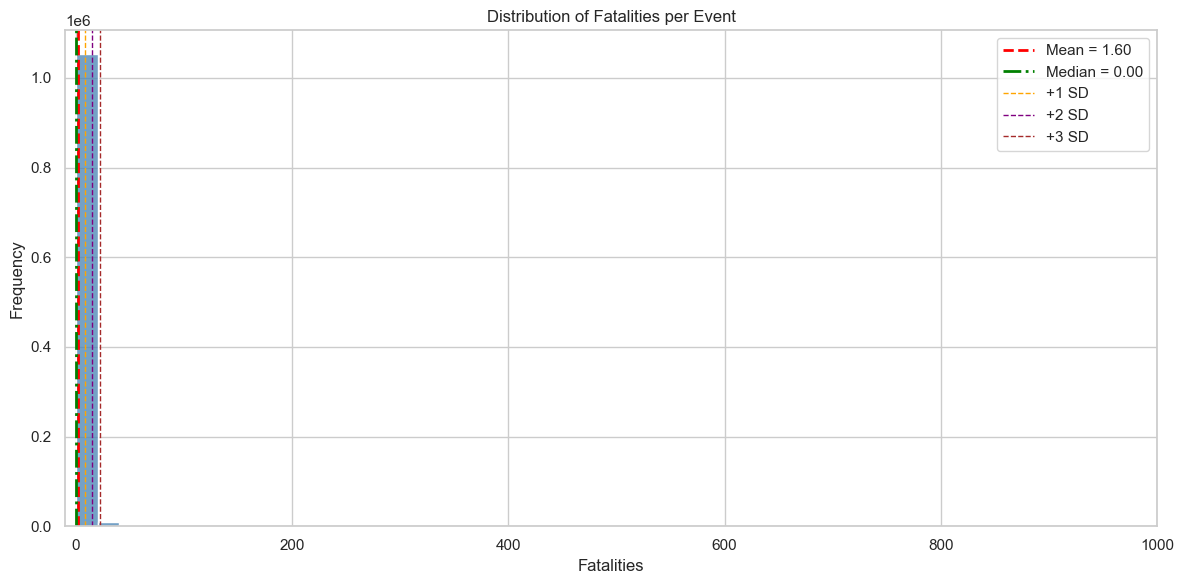

In [ ]:
# create a histogram of fatalities with mean, median, and standard deviation lines

# extract fatalities as a NumPy array (for convenience)
fatal = df["fatalities"]

# compute statistics
mean = fatal.mean()
median = fatal.median()
std = fatal.std()

# create SD boundaries
sd1_pos = mean + std
sd2_pos = mean + 2*std
sd3_pos = mean + 3*std

# set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# create histogram 
sns.histplot(fatal, bins=50, kde=False, color="steelblue")

# add vertical lines
plt.axvline(mean, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(median, color="green", linestyle="-.", linewidth=2, label=f"Median = {median:.2f}")
plt.axvline(sd1_pos, color="orange", linestyle="--", linewidth=1, label="+1 SD")
plt.axvline(sd2_pos, color="purple", linestyle="--", linewidth=1, label="+2 SD")
plt.axvline(sd3_pos, color="brown", linestyle="--", linewidth=1, label="+3 SD")

# limit x axis
plt.xlim(-10, 1000)

# labels and legend
plt.title("Distribution of Fatalities per Event")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.tight_layout()
plt.show()

As expected: 

1. At the normal linear scale the histogram is not very informative
2. Standard deviation is not meaningful because it is very inflated by the extreme values 

Try at rescaling to logarithmic.

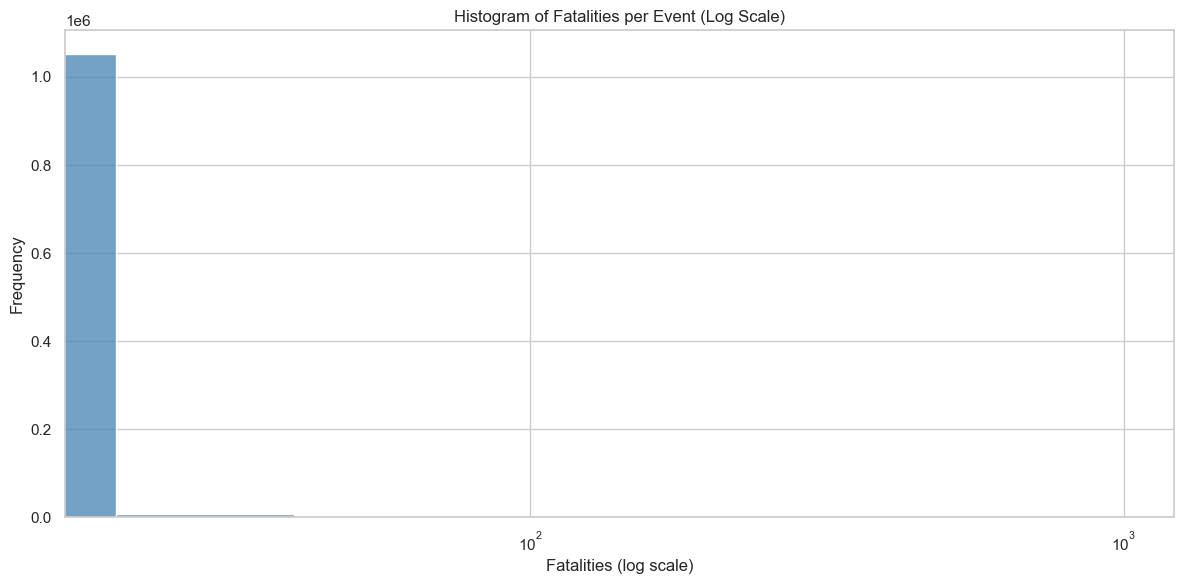

In [42]:
# create a histogram of fatalities with log scale

# extract fatalities
fatal = df["fatalities"]

#set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# create histogram
sns.histplot(fatal, bins=50, color="steelblue", edgecolor=None)

# use log scale on x-axis
plt.xscale("log")

# labels
plt.title("Histogram of Fatalities per Event (Log Scale)")
plt.xlabel("Fatalities (log scale)")
plt.ylabel("Frequency")

# show plot
plt.tight_layout()
plt.show()

<ins>**Conclusions**</ins>

1. Histograms, either linear or log scaled, are not informative in this case because 0s and 1s dominate.
2. The extreme events are too rare to be visible.
3. The range spans orders of magnitude.

The above are true for phenomena such as: seismology, financial crashes, epidemiology, or insurance risk analysis. In other words: very rare events of massive consequences, surrounded by a vast majority of inconsequential ones. All of these are examples of <ins>**Power Law (or Pareto) distributions**</ins>.

The standard practice in the aforementioned fields is to examine the tail (the only part that actually matters) using a log-log Complementary Cumulative Distribution Function (CCDF). 

<ins>**CCDF**</ins> is the complement of the cumulative distribution function (CDF) which, long story short, shows the probability that a random variable (X) will take a value less than or equal to a specific value (x). 

- $F(x) = P(X \le x)$

However, since we care about the probability of large values, will use CCDF, the complement of CDF:
- $\mathrm{CCDF}(x) = 1 - F(x) = P(X \ge x)$

CCDF should reveal tail behaviour, such as:
1. “What is the probability that an event kills at least x people?”
2. “How common are extreme events?”
3. “How quickly does the tail decay?”

Further advantage of a log-log CCDF plot:
- rescaling to logarithmic creats a line, thus creating the easiest way to visualise a power-law model


In [51]:
fatal = df[df["fatalities"] > 0]["fatalities"].values
fatal_sorted = np.sort(fatal)
1-np.arange(1, len(fatal_sorted)+1) / len(fatal_sorted)

array([9.99997586e-01, 9.99995172e-01, 9.99992758e-01, ...,
       4.82822387e-06, 2.41411193e-06, 0.00000000e+00], shape=(414231,))

In [52]:
np.arange(1, len(fatal_sorted)+1) / len(fatal_sorted)

array([2.41411193e-06, 4.82822387e-06, 7.24233580e-06, ...,
       9.99995172e-01, 9.99997586e-01, 1.00000000e+00], shape=(414231,))

In [50]:
len(fatal_sorted)+1/ len(fatal_sorted)

414231.0000024141

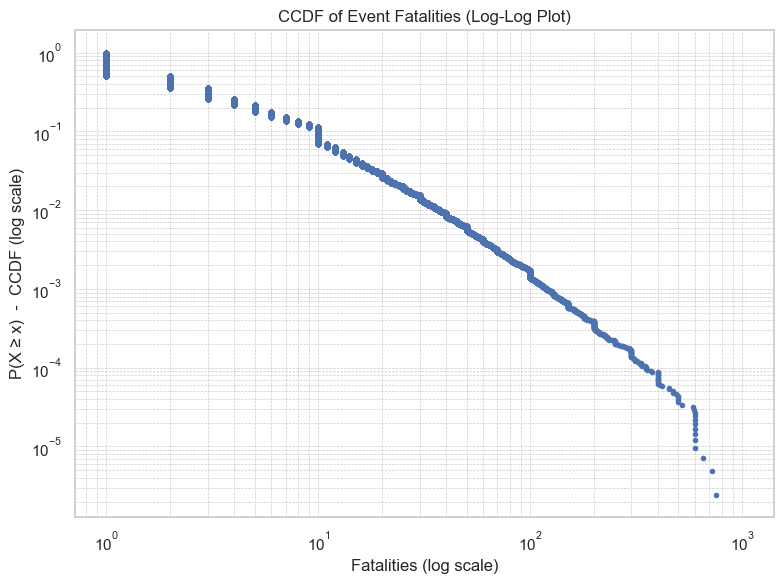

In [ ]:
# create a log-log plot of the CCDF of fatalities

# use only events with fatalities > 0
fatal = df[df["fatalities"] > 0]["fatalities"].values

# sort values
fatal_sorted = np.sort(fatal)

# compute CCDF: P(X ≥ x)
ccdf = 1.0 - np.arange(1, len(fatal_sorted)+1) / len(fatal_sorted)

plt.figure(figsize=(8,6))

plt.loglog(fatal_sorted, ccdf, marker='.', linestyle='none')

plt.xlabel("Fatalities (log scale)")
plt.ylabel("P(X ≥ x)  -  CCDF (log scale)")
plt.title("CCDF of Event Fatalities (Log-Log Plot)")

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


<ins>**Figure Interpretation**</ins>:

- The lower-fatality region (1–10 deaths) exhibits irregular behavior, which is expected due to mixed event types and reporting variability. 
- Between approximately 10 and 200–300 fatalities, an almost linear trend consistent with power-law or Pareto-like heavy-tailed behavior. 
- Beyond this range, the curve bends downward, suggesting finite-size effects or a truncated power-law tail. 

<ins>**In laymen terms**</ins>: for most events there is a steady decrease in chance of occurence for increasingly large fatalities (inverse linear relationship), however, past a certain threshold it becomes exponentially less likely for events to have higher fatalities.

<ins>**Note**</ins>: while the CCDF suggests potential power-law behavior in the tail, formal model fitting and statistical comparison are required to confirm the distributional class.

## DATA CLEANING TASK LIST

1. actor1, actor2, population_1km, population_best, deal with missing values
2. disorder_type, has only 1 value type, drop
3. Consider dropping:
    - actor1/actor2 (name of beligerent), many unique values, difficult to interpret
3. interaction, check if column value can be grouped together
4. source, try to recategorise values, too many in current state
5. source_scale, try to recategorise values, note category 'Other'
6. Create additional dataset for DBSCAN without geo_precision = 3